# Station of La Chaux-de-Fonds

Station: CDF (Chaux-de-Fonds), precipitation dataset `rre150d0`

Daily total precipitation, from 6 UTC to 6 UTC (next day)

Temporal coverage: 01.01.1900 - 31.12.2023

Homogenized data: 1959 - 1997

Displayed data: 1959 - 2023

In [ ]:
# Packages for data processing
install.packages("dplyr")
library(dplyr)

install.packages("ggplot2")
library(ggplot2)

install.packages("zoo")
library(zoo)

In [ ]:
# Preprocessing
url <- "https://raw.githubusercontent.com/cutiips/Master-Thesis/main/CDF_rre150d0.txt"
CDF_P <- read.table(url, header = TRUE, as.is = FALSE, sep = ";")

colnames(CDF_P)[2] <- "date"
colnames(CDF_P)[3] <- "precip"

CDF_P$date <- as.Date(as.character(CDF_P$date), format = "%Y%m%d")
CDF_P$year <- format(CDF_P$date, "%Y")
CDF_P$month <- format(CDF_P$date, "%m")
CDF_P$Year <- as.numeric(CDF_P$year)
CDF_P$month <- as.numeric(CDF_P$month)
CDF_P$precip <- as.numeric(CDF_P$precip)

# Filter years prior 1959
CDF_P_filtered <- CDF_P[CDF_P$Year >= 1959, ]

In [ ]:
# Check for missing values
sum(is.na(CDF_P))

[1] 0

## R10mm

In [ ]:
# Annual count of days with precipitation ≥ 10 mm
R10mm_days_CDF <- CDF_P_filtered[CDF_P_filtered$precip >= 10, ]
R10mm_summary_CDF <- aggregate(R10mm_days_CDF$precip,
  by = list(Year = R10mm_days_CDF$Year),FUN = length)
colnames(R10mm_summary_CDF)[2] <- "Count_R10mm_CDF"

In [ ]:
# Linear trend analysis (based on all availible data)
model_R10mm_CDF <- lm(Count_R10mm_CDF ~ Year, data = R10mm_summary_CDF)
summary(model_R10mm_CDF)


Call:
lm(formula = Count_R10mm_CDF ~ Year, data = R10mm_summary_CDF)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7726  -6.2787  -0.2514   6.9128  21.8170 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  22.80913  127.19679   0.179    0.858
Year          0.01368    0.06388   0.214    0.831

Residual standard error: 9.663 on 63 degrees of freedom
Multiple R-squared:  0.0007274,	Adjusted R-squared:  -0.01513 
F-statistic: 0.04586 on 1 and 63 DF,  p-value: 0.8311


In [ ]:
# Data homogenization period (CDF) : 1959 - 1997
R10mm_summary_CDF$Dataset <- ifelse(R10mm_summary_CDF$Year <= 1997,
  "homogenized", "non-homogenized")
R10mm_homog_CDF <- R10mm_summary_CDF[R10mm_summary_CDF$Dataset == "homogenized", ]

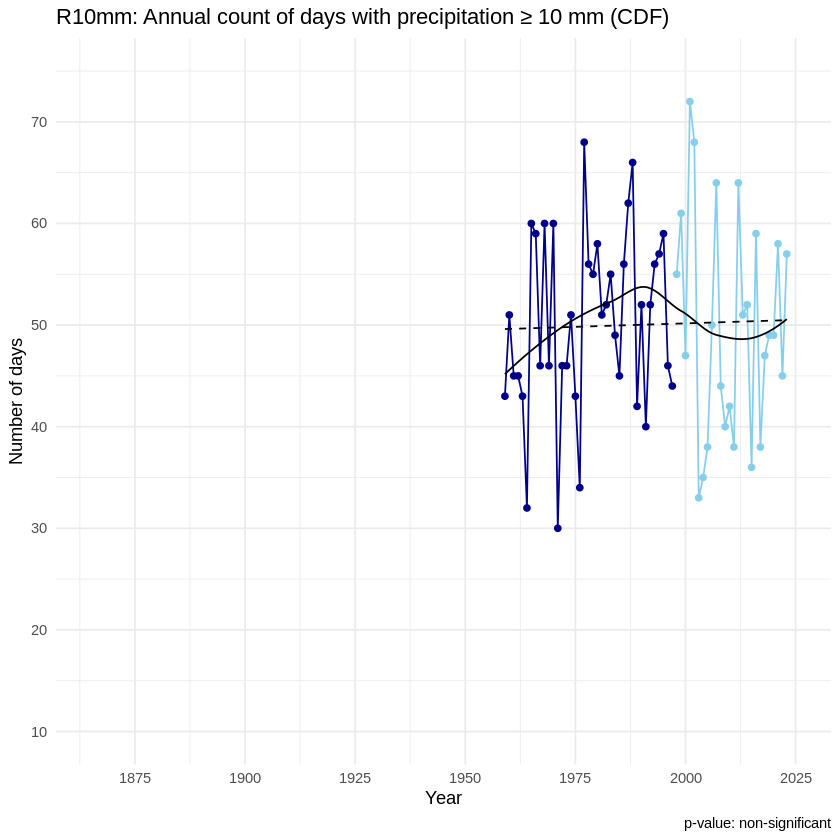

In [ ]:
# Graph with data homogenization period
ggplot(R10mm_summary_CDF, aes(x = Year, y = Count_R10mm_CDF)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "R10mm: Annual count of days with precipitation ≥ 10 mm (CDF)",
  x = "Year",y = "Number of days", caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(10, 75), breaks = seq(10, 75, by = 10)) +
  scale_x_continuous(limits = c(1865, 2025), breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue","non-homogenized" = "skyblue")) +
  theme_minimal() +theme(legend.position = "none")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_R10mm_homog_CDF <- mean(R10mm_homog_CDF$Count_R10mm_CDF, na.rm = TRUE)

# Usual range
range_R10mm_homog_CDF <- quantile(R10mm_homog_CDF$Count_R10mm_CDF,
  probs = c(0.05, 0.95),na.rm = TRUE)

# R95p

Total annual precipitation from days exceeding the 95th percentile,

Based on wet days (P ≥ 1 mm), during the 1961–1990 reference period  

In [ ]:
# 95th percentile for wet days (1961–1990)
CDF_reference_period <- CDF_P[CDF_P$date >= as.Date("1961-01-01") &
  CDF_P$date <= as.Date("1990-12-31") & CDF_P$precip >= 1, ]
threshold_95_CDF <- quantile(CDF_reference_period$precip, 0.95, na.rm = TRUE)

In [ ]:
# Days above the 95th percentile, and compute annual total
R95p_summary_CDF <- CDF_P_filtered[CDF_P_filtered$precip >= 1 &
  CDF_P_filtered$precip > threshold_95_CDF, ]
R95p_summary_CDF <- aggregate(R95p_summary_CDF$precip,
  by = list(Year = R95p_summary_CDF$Year),FUN = sum)
colnames(R95p_summary_CDF)[2] <- "Total_R95p_CDF"
R95p_summary_CDF$Year <- as.numeric(R95p_summary_CDF$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_R95p_CDF <- lm(Total_R95p_CDF ~ Year, data = R95p_summary_CDF)
summary(model_R95p_CDF)


Call:
lm(formula = Total_R95p_CDF ~ Year, data = R95p_summary_CDF)

Residuals:
     Min       1Q   Median       3Q      Max 
-236.570  -92.095    7.222   52.415  274.195 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -624.3668  1641.1495   -0.38    0.705
Year           0.4537     0.8242    0.55    0.584

Residual standard error: 124.7 on 63 degrees of freedom
Multiple R-squared:  0.004785,	Adjusted R-squared:  -0.01101 
F-statistic: 0.3029 on 1 and 63 DF,  p-value: 0.584


In [ ]:
# Data homogenization period (CDF) : 1959 - 1997
R95p_summary_CDF$Dataset <- ifelse(R95p_summary_CDF$Year <= 1997,
  "homogenized", "non-homogenized")
R95p_homog_CDF <- R95p_summary_CDF[R95p_summary_CDF$Dataset == "homogenized", ]

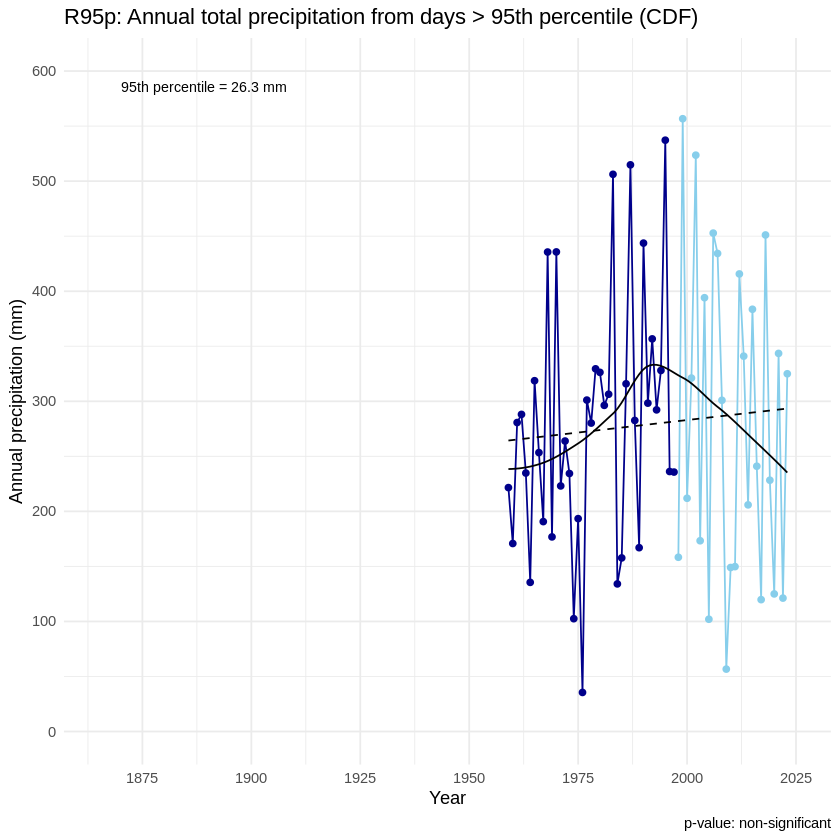

In [ ]:
# Graph with data homogenization period
ggplot(R95p_summary_CDF, aes(x = Year, y = Total_R95p_CDF)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x,  se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x,  se = FALSE, color = "black", linewidth = 0.5) + labs(title = "R95p: Annual total precipitation from days > 95th percentile (CDF)",
  x = "Year", y = "Annual precipitation (mm)", caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(0, 600), breaks = seq(0, 600, by = 100)) +
  scale_x_continuous(limits = c(1865, 2025), breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue","non-homogenized" = "skyblue")) +
  theme_minimal() +
  theme(legend.position = "none") +
  annotate("text", x = 1870, y = 590, label = "95th percentile = 26.3 mm",
           hjust = 0, vjust = 1, size = 3, color = "black")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_R95p_homog_CDF <- mean(R95p_homog_CDF$Total_R95p_CDF, na.rm = TRUE)

# Range
range_R95p_homog_CDF <- quantile(R95p_homog_CDF$Total_R95p_CDF,
  probs = c(0.05, 0.95), na.rm = TRUE)

## Complementary approach : R95p days

Annual count of days with precipitation > 95th percentile

Based on wet days (P ≥ 1 mm), during the 1961–1990 reference period

In [ ]:
# 95th percentile for wet days (1961–1990)
CDF_reference_period <- CDF_P[CDF_P$date >= as.Date("1961-01-01") &
  CDF_P$date <= as.Date("1990-12-31") & CDF_P$precip >= 1, ]
threshold_95_days_CDF <- quantile(CDF_reference_period$precip, 0.95, na.rm = TRUE)

In [ ]:
# Number of days per year exceeding this threshold
R95p_days_CDF <- CDF_P_filtered[CDF_P_filtered$precip >= 1 &
  CDF_P_filtered$precip > threshold_95_days_CDF, ]
R95p_days_summary_CDF <- aggregate(R95p_days_CDF$precip,
  by = list(Year = R95p_days_CDF$Year),FUN = length)
colnames(R95p_days_summary_CDF)[2] <- "Days_R95p_CDF"

In [ ]:
# Linear trend analysis (based on all availible data)
model_R95p_days_CDF <- lm(Days_R95p_CDF ~ Year, data = R95p_days_summary_CDF)
summary(model_R95p_days_CDF)


Call:
lm(formula = Days_R95p_CDF ~ Year, data = R95p_days_summary_CDF)

Residuals:
   Min     1Q Median     3Q    Max 
-6.544 -2.337 -0.049  2.093  8.158 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -18.01923   42.10943  -0.428    0.670
Year          0.01294    0.02115   0.612    0.543

Residual standard error: 3.199 on 63 degrees of freedom
Multiple R-squared:  0.005904,	Adjusted R-squared:  -0.009875 
F-statistic: 0.3742 on 1 and 63 DF,  p-value: 0.5429


In [ ]:
# Data homogenization period (CDF) : 1959 - 1997
R95p_days_summary_CDF$Dataset <- ifelse(R95p_days_summary_CDF$Year <= 1997,
  "homogenized", "non-homogenized")
R95p_days_homog_CDF <- R95p_days_summary_CDF[R95p_days_summary_CDF$Dataset == "homogenized", ]

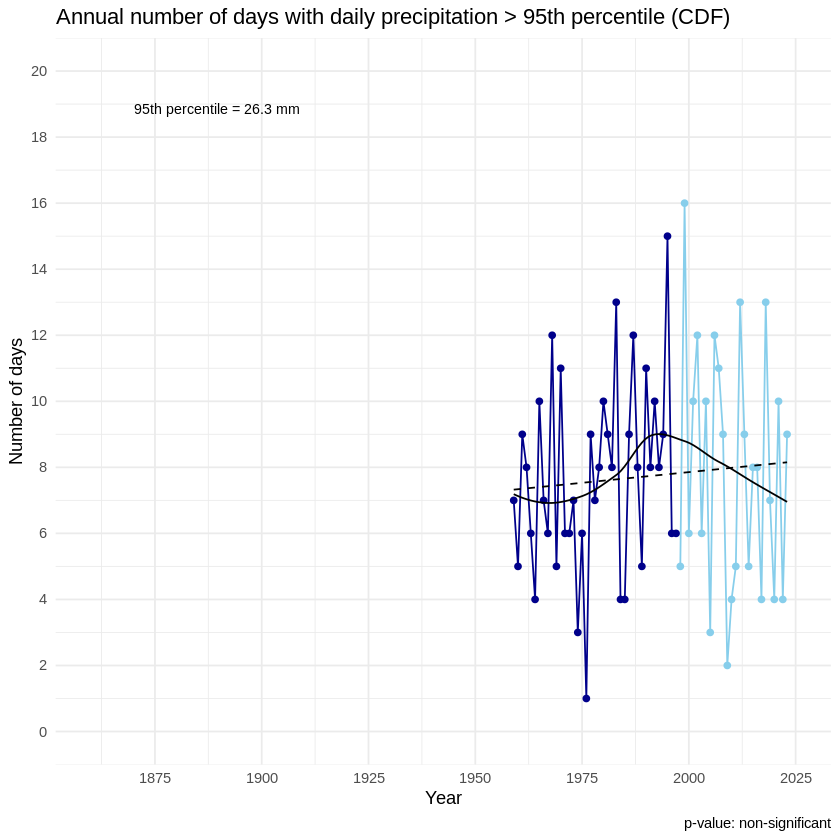

In [ ]:
# Graph with data homogenization period
ggplot(R95p_days_summary_CDF, aes(x = Year, y = Days_R95p_CDF)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x,  se = FALSE, color = "black",
  linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x,  se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "Annual number of days with daily precipitation > 95th percentile (CDF)",
  x = "Year",y = "Number of days",
  caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(0, 20), breaks = seq(0, 20, by = 2)) +
  scale_x_continuous(limits = c(1860, 2025), breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue","non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none") +
  annotate("text", x = 1870, y = 19, label = "95th percentile = 26.3 mm",
  hjust = 0, vjust = 1, size = 3, color = "black")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_R95p_days_homog_CDF <- mean(R95p_days_homog_CDF$Days_R95p_CDF, na.rm = TRUE)

# Range
range_R95p_days_homog_CDF <- quantile(R95p_days_homog_CDF$Days_R95p_CDF,
  probs = c(0.05, 0.95), na.rm = TRUE)

## Rx1day
Annual maximum of daily precipitation


In [ ]:
# Compute annual maximum of daily precipitation
Rx1day_summary_CDF <- aggregate(CDF_P_filtered$precip,
  by = list(Year = CDF_P_filtered$Year),FUN = max, na.rm = TRUE)
colnames(Rx1day_summary_CDF)[2] <- "Yearly_Max_Rx1day_CDF"

In [ ]:
# Linear trend analysis (based on all availible data)
model_Rx1day_CDF <- lm(Yearly_Max_Rx1day_CDF ~ Year, data = Rx1day_summary_CDF)
summary(model_Rx1day_CDF)


Call:
lm(formula = Yearly_Max_Rx1day_CDF ~ Year, data = Rx1day_summary_CDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.825 -10.416  -2.615   5.679  50.077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 5.020e+01  1.866e+02   0.269    0.789
Year        2.622e-04  9.370e-02   0.003    0.998

Residual standard error: 14.17 on 63 degrees of freedom
Multiple R-squared:  1.243e-07,	Adjusted R-squared:  -0.01587 
F-statistic: 7.833e-06 on 1 and 63 DF,  p-value: 0.9978


In [ ]:
# Data homogenization period (CDF) : 1959 - 1997
Rx1day_summary_CDF$Dataset <- ifelse(Rx1day_summary_CDF$Year <= 1997,
  "homogenized", "non-homogenized")
Rx1day_homog_CDF <- Rx1day_summary_CDF[Rx1day_summary_CDF$Dataset == "homogenized", ]

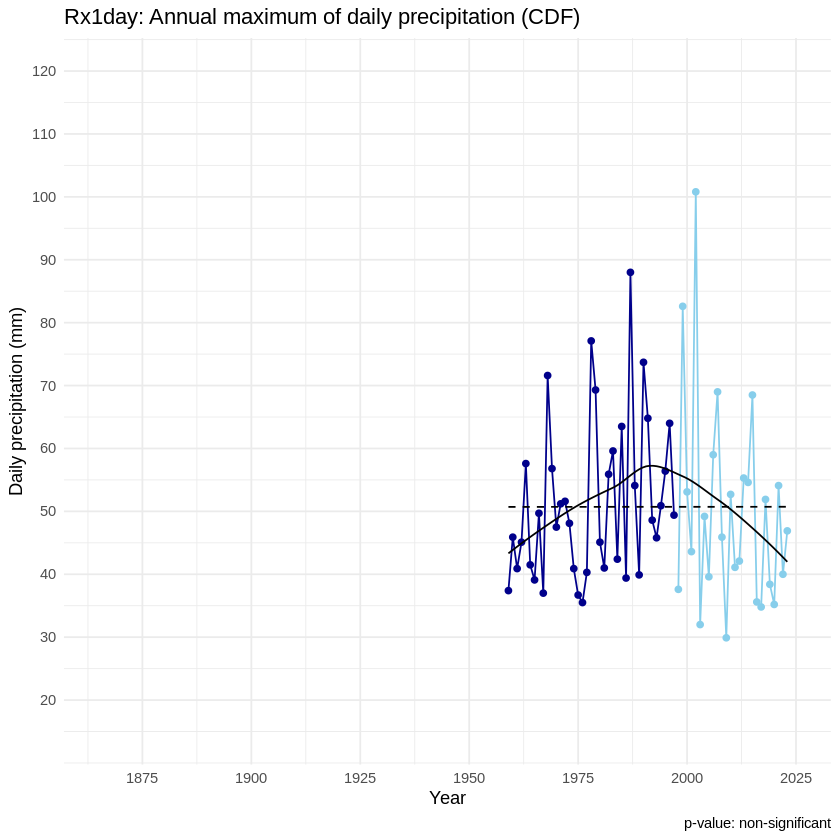

In [ ]:
# Graph with data homogenization period
ggplot(Rx1day_summary_CDF, aes(x = Year, y = Yearly_Max_Rx1day_CDF)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x,  se = FALSE, color = "black",
  linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x,  se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "Rx1day: Annual maximum of daily precipitation (CDF)",
  x = "Year", y = "Daily precipitation (mm)", caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(15, 120), breaks = seq(20, 120, by = 10)) +
  scale_x_continuous(limits = c(1865, 2025), breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_Rx1day_homog_CDF <- mean(Rx1day_homog_CDF$Yearly_Max_Rx1day_CDF, na.rm = TRUE)

# Range
range_Rx1day_homog_CDF <- quantile(Rx1day_homog_CDF$Yearly_Max_Rx1day_CDF,
  probs = c(0.05, 0.95), na.rm = TRUE)

## CWD

Maximum number of consecutive wet days

In [ ]:
# Binary wet day indicator
CDF_P_filtered$Wet_Day <- ifelse(CDF_P_filtered$precip >= 1, 1, 0)

In [ ]:
# Create the loop to compute the maximum wet spell length
CWD_summary_CDF <- data.frame(Year = unique(CDF_P_filtered$Year), Max_CWD_CDF = NA)
for (i in seq_along(CWD_summary_CDF$Year)) {
  year_data <- CDF_P_filtered[CDF_P_filtered$Year == CWD_summary_CDF$Year[i], ]
  rle_wet <- rle(year_data$Wet_Day)
  if (any(rle_wet$values == 1)) {CWD_summary_CDF$Max_CWD_CDF[i] <- max(rle_wet$lengths[rle_wet$values == 1], na.rm = TRUE)}
  else {CWD_summary_CDF$Max_CWD_CDF[i] <- 0}}
CWD_summary_CDF$Year <- as.numeric(CWD_summary_CDF$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_CWD_CDF <- lm(Max_CWD_CDF ~ Year, data = CWD_summary_CDF)
summary(model_CWD_CDF)


Call:
lm(formula = Max_CWD_CDF ~ Year, data = CWD_summary_CDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2038 -2.7849 -0.8981  1.3056 11.1132 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -11.53798   47.46268  -0.243    0.809
Year          0.01132    0.02384   0.475    0.637

Residual standard error: 3.606 on 63 degrees of freedom
Multiple R-squared:  0.003567,	Adjusted R-squared:  -0.01225 
F-statistic: 0.2255 on 1 and 63 DF,  p-value: 0.6365


In [ ]:
# Data homogenization period (CDF) : 1959 - 1997
CWD_summary_CDF$Dataset <- ifelse(CWD_summary_CDF$Year <= 1997,
  "homogenized", "non-homogenized")
CWD_homog_CDF <- CWD_summary_CDF[CWD_summary_CDF$Dataset == "homogenized", ]

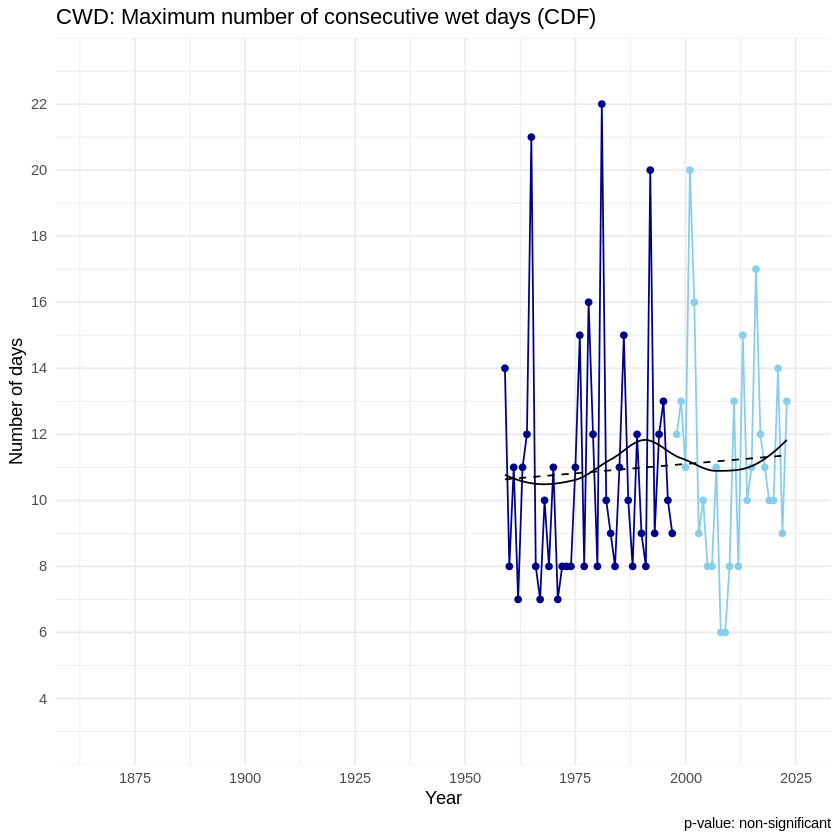

In [ ]:
# Graph with data homogenization period
ggplot(CWD_summary_CDF, aes(x = Year, y = Max_CWD_CDF)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black",
  linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "CWD: Maximum number of consecutive wet days (CDF)",
  x = "Year", y = "Number of days", caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(3, 23), breaks = seq(4, 23, by = 2)) +
  scale_x_continuous(limits = c(1865, 2025), breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue","non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_CWD_homog_CDF <- mean(CWD_homog_CDF$Max_CWD_CDF, na.rm = TRUE)

# Range
range_CWD_homog_CDF <- quantile(CWD_homog_CDF$Max_CWD_CDF,
  probs = c(0.05, 0.95), na.rm = TRUE)